In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

import generate_dataset
from multiobject import generate_multiobject_dataset, iterate_video_dataset
from sprites import generate_dsprites, generate_binary_mnist, generate_simiansprites
from utils import get_date_str, show_img_grid

In [2]:
import sys
sys.setrecursionlimit(10000) # or any number you want

In [3]:
DELTA_T = 0.015
DISTANCE_TO_SCREEN = 106
FPS = 60
HOLD_DEGREES = 3
SCALE_MOVIE = 1
SCREEN_DIMS = (100, 62)
SCREEN_RES = (1920, 1080)
SCALED_VIDEO_RES = (SCREEN_RES[0], SCREEN_RES[1])
SPRITE_RES = (280, 280)
VIDEO_SECONDS = 5
VIDEO_RES = (128, 72)
VIDEO_THRESHOLDS = [
    [(SCREEN_RES[0] - SCALED_VIDEO_RES[0]) / 2, (SCREEN_RES[1] - SCALED_VIDEO_RES[1]) / 2],
    [(SCREEN_RES[0] + SCALED_VIDEO_RES[0]) / 2, (SCREEN_RES[1] + SCALED_VIDEO_RES[1]) / 2]
]

In [4]:
SCREEN_HALFWIDTH_DEGREES = np.degrees(np.arctan(SCREEN_DIMS[0] / 2 / DISTANCE_TO_SCREEN))
SCREEN_HALFHEIGHT_DEGREES = np.degrees(np.arctan(SCREEN_DIMS[1] / 2 / DISTANCE_TO_SCREEN))

In [5]:
def degrees_to_coords(theta):
    return theta  / (2 * SCREEN_HALFWIDTH_DEGREES)

def degrees_to_pixels(theta):
    return degrees_to_coords(theta) * SCREEN_RES[0]

def circle_to_pixels(x, y, rx, ry):
    x = SCREEN_RES[0] / 2 + degrees_to_pixels(x)
    y = SCREEN_RES[1] / 2 - degrees_to_pixels(y)
    return float(x), float(y), float(degrees_to_pixels(rx)), float(degrees_to_pixels(ry))

def rfs_to_pixels(rfs):
    for ((x, y, rx, ry), p) in rfs:
        x, y, rx, ry = circle_to_pixels(x, y, rx + HOLD_DEGREES, ry + HOLD_DEGREES)
        x = (x - VIDEO_THRESHOLDS[0][0]) / SCALE_MOVIE[0]
        y = (y - VIDEO_THRESHOLDS[0][1]) / SCALE_MOVIE[1]
        rx /= SCALE_MOVIE
        ry /= SCALE_MOVIE
        if x >= 0 and x < VIDEO_RES[0] and y >= 0 and y < VIDEO_RES[1]:
            yield ((round(x), round(y), round(rx), round(ry)), p)

In [6]:
VIDEOS_PER_SPRITE = 4
TIMESTEPS = VIDEO_SECONDS * FPS

In [7]:
sprites, attrs = generate_simiansprites(SPRITE_RES[0])

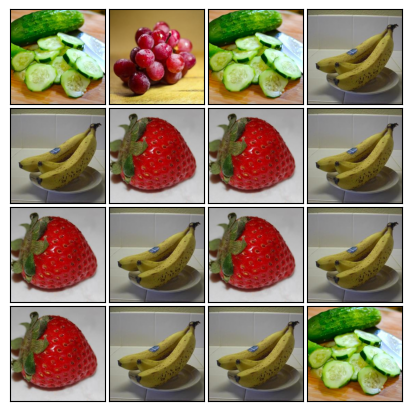

In [8]:
# Show sprites
show_img_grid(4, sprites, random_selection=True)

In [9]:
ch = sprites[0].shape[-1]
img_shape = (*SCREEN_RES, ch)

In [10]:
COUNTS = {k: VIDEOS_PER_SPRITE for k in attrs['labels']}

In [11]:
generator = iterate_video_dataset(VIDEOS_PER_SPRITE * sprites.shape[0], img_shape, sprites,
                                  attrs, COUNTS, VIDEO_SECONDS * FPS, DELTA_T,
                                  allow_overlap=True)

In [12]:
GENERATED_PATH = 'generated/simiansprites/'

In [13]:
if not os.path.exists(GENERATED_PATH):
    os.makedirs(GENERATED_PATH)

In [14]:
import cv2 as cv

In [15]:
for v, (video, _, _) in enumerate(generator):
    writer = cv.VideoWriter(GENERATED_PATH + 'simiansprites%d.mp4' % v, cv.VideoWriter_fourcc(*"mp4v"), FPS, SCREEN_RES, True)
    for t in range(video.shape[0]):
        writer.write(cv.cvtColor(video[t], cv.COLOR_RGB2BGR))
    writer.release()

num sprites: 4


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [05:41<00:00, 21.34s/it]
